# Intro to Machine Learning

This is a Python notebook which accompanies the "Intro to Machine Learning" course on Kaggle. The model to be built aims to predict house prices in Iowa using a decision tree.

In [1]:
import pandas as pd

In [2]:
iowa_file_path = "train.csv"
home_data = pd.read_csv(iowa_file_path)
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
for column in home_data.columns:
    if "yr" in column.lower() or "year" in column.lower():
        print(column, home_data.loc[:, column].max())

YearBuilt 2010
YearRemodAdd 2010
GarageYrBlt 2010.0
YrSold 2010


From the data above it appears that all time-related information about the dataset cuts off at 2010, implying that the dataset is likely out of date.

In [4]:
y = home_data.SalePrice # property of homes we would like to predict

In [5]:
print(home_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We proceed to define the features we will be using in the model. Since the original dataset consists of multiple columns, we will only pick a number of them to make the model simpler. The columns which intuitively make sense at first glance are:
  * LotArea -- total area of home
  * YearBuilt -- year in which construction of home finished
  * 1stFlrSF -- area of first floor
  * 2ndFlrSF -- area of second floor
  * FullBath -- number of bathrooms
  * BedroomAbvGr -- number of bedrooms above the ground floor
  * TotRmsAbvGrd -- total number of rooms above the ground floor

In [6]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data.loc[:, features]
print(X.describe())
print(X.head())

             LotArea    YearBuilt     1stFlrSF     2ndFlrSF     FullBath  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082  1971.267808  1162.626712   346.992466     1.565068   
std      9981.264932    30.202904   386.587738   436.528436     0.550916   
min      1300.000000  1872.000000   334.000000     0.000000     0.000000   
25%      7553.500000  1954.000000   882.000000     0.000000     1.000000   
50%      9478.500000  1973.000000  1087.000000     0.000000     2.000000   
75%     11601.500000  2000.000000  1391.250000   728.000000     2.000000   
max    215245.000000  2010.000000  4692.000000  2065.000000     3.000000   

       BedroomAbvGr  TotRmsAbvGrd  
count   1460.000000   1460.000000  
mean       2.866438      6.517808  
std        0.815778      1.625393  
min        0.000000      2.000000  
25%        2.000000      5.000000  
50%        3.000000      6.000000  
75%        3.000000      7.000000  
max        8.000000     14.

We now fit a basic decision tree using the scikit-learn package.

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(X, y)
predictions = iowa_model.predict(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


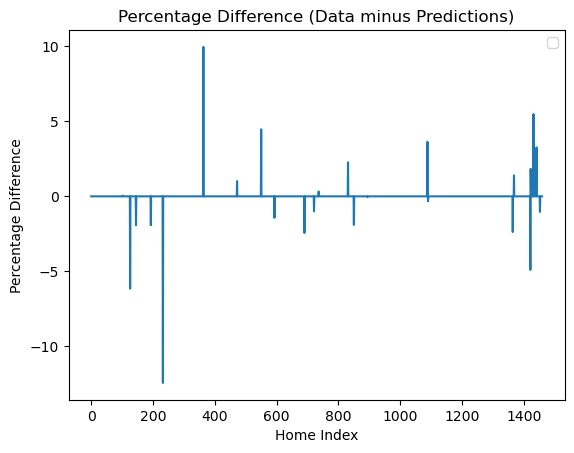

In [17]:
import matplotlib.pyplot as plt

plt.plot((y-predictions)/y * 100)
plt.title("Percentage Difference (Data minus Predictions)")
plt.ylabel("Percentage Difference")
plt.xlabel("Home Index")
plt.legend()

In [20]:
print(predictions[:5])
print(y.head())

[208500. 181500. 223500. 140000. 250000.]
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


The model currently seems to predict the majority of the prices with perfect accuracy, which is suprising. Consider what the mean absolute error is below.

In [22]:
from sklearn.metrics import mean_absolute_error

print("MAE (dollars):", mean_absolute_error(y, predictions))

MAE (dollars): 62.35433789954339


This is very low. However, this shouldn't be suprising since we have calculated the MAE on the training data. To better determine the quality of the model, we shall split the data into a training and a testing set.

In [27]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

In [29]:
iowa_model_new = DecisionTreeRegressor(random_state=1)
iowa_model_new.fit(train_X, train_y)
predictions_test = iowa_model_new.predict(test_X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


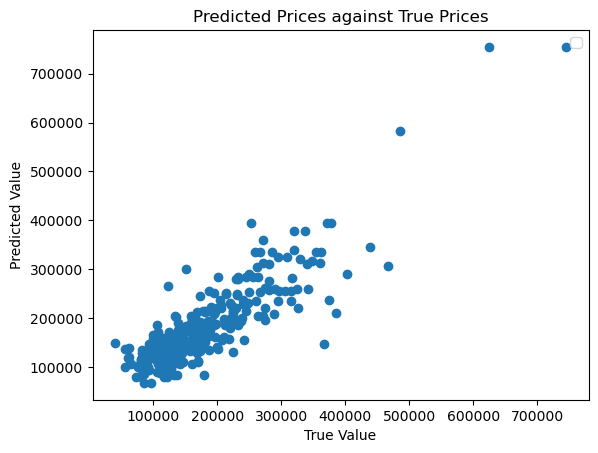

In [36]:
plt.scatter(test_y, predictions_test)
plt.title("Predicted Prices against True Prices")
plt.ylabel("Predicted Value")
plt.xlabel("True Value")
plt.legend()

In [37]:
test_mae = mean_absolute_error(test_y, predictions_test)
print("MAE on testing data (dollars):", test_mae)

MAE on testing data (dollars): 29652.931506849316


We see that the mean absolute error is much larger when evaluated on the testing dataset, which is what one would typically expect. However, we still need to determine whether this is a good model. To do so, we can find out whether any improvements can be made by determining whether the model is over- or under-fitting the training data.

One idea is to investigate how the MAE depends on the depth of the decission tree, or in turn - the number of leaves.

In [39]:
print(iowa_model_new.get_n_leaves())

1070


In [40]:
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    tmp_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    tmp_model.fit(train_X, train_y)
    test_preds = tmp_model.predict(test_X)
    return mean_absolute_error(test_y, test_preds)

Optimal number of leaves: 70
MAE for optimal number of leaves: 26763.340028993345


Text(0.5, 0, 'Number of Leaves')

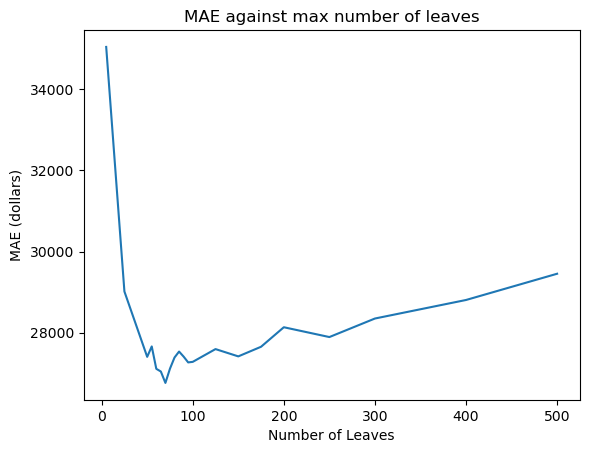

In [47]:
max_leaf_nodes_values = [5, 25, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 125, 150, 175, 200, 250, 300, 400, 500]
mae_values = []
min_mae = None
best_leaf_no = None
for max_leaf_nodes in max_leaf_nodes_values:
    tmp_mae = get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y)
    mae_values.append(tmp_mae)
    if min_mae == None or tmp_mae < min_mae:
        min_mae = tmp_mae
        best_leaf_no = max_leaf_nodes

print("Optimal number of leaves:", best_leaf_no)
print("MAE for optimal number of leaves:", min_mae)

plt.plot(max_leaf_nodes_values, mae_values)
plt.title("MAE against max number of leaves")
plt.ylabel("MAE (dollars)")
plt.xlabel("Number of Leaves")

It turns out that our original model, which used just 25 leaves, was underfitting the data. Instead, a better model would set the maximum number of leaves to 70, as depicted by the plot above. Note that the shape of the plot is the one typically expected, showing regions of underfitting and overfitting, separeted by the optimal number of leaves at around 70.

Another model we could use is a Random Forest. Instead of fitting a single tree to the data, we fit multiple trees which differ in a random way between one another. Our final prediction is formed by considering the predictions of all trees in the so-called forest.

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
test_predictions = rf_model.predict(test_X)
rf_test_mae = mean_absolute_error(test_y, test_predictions)
print("MAE for Random Forest (dollars):", rf_test_mae)

MAE for Random Forest (dollars): 21857.15912981083


Note that we get significantly better performance, i.e., a much lower MAE, when using the random forest, rather than a single decision tree.

Typically, when the paramters of the model have been decided upon using the train-test data split, one fits the model using all available data.

In [54]:
rf_model_full = RandomForestRegressor(random_state=1)
rf_model_full.fit(X, y)
test_data = pd.read_csv("test.csv")
test_X_full = test_data.loc[:, features]
test_predictions_full = rf_model_full.predict(test_X_full)

[122656.58 156789.   182959.   ... 151283.01 127878.   225959.8 ]


In [55]:
# generate submission for Kaggle competition

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_predictions_full})
output.to_csv('submission.csv', index=False)